# **Image Cartoonizer**
Project by: Apurva Suryawanshi

Importing various Libraries

In [1]:
import cv2
import urllib
import numpy as np
from google.colab.patches import cv2_imshow

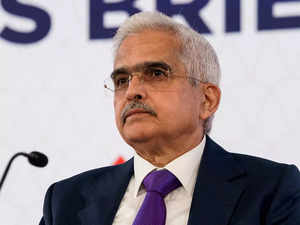

In [21]:
req=urllib.request.urlopen(url = 'https://img.etimg.com/thumb/msid-100971053,width-300,height-225,imgsize-58290,resizemode-75/road-to-4-inflation-slow-says-rbi-governor-shaktikanta-das.jpg')
arr = np.asarray(bytearray(req.read()),dtype=np.uint8)
img = cv2.imdecode(arr, -1)
cv2_imshow(img)

Here we have converted the image in numpy array using the byte array,because while fetching any image from url we need to convert it into byte array.

*  Then we Decode it using cv2
*   Then we show the image





*   **Detail Enhancer Filter:** here we are using two parameters in opencv under cv2




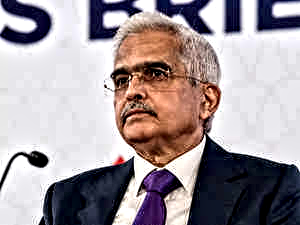

In [22]:
dst=cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
cv2_imshow(dst)

here we have used 3 parameters
the sigma_s is a smoothing parameter,it smooths the pixels by taking reference of the neighbouring pixels.

but if the smoothing is done all over the image then the colors will be mixed all over so, we use sigma_r which maintains color distinction if we keep its value to the higher side it will have some constant color we should keep its value low



*   **Pencil Sketch Filter:** here we have an extra parameter know as shade factor its value ranges from 0-0.1
if we keep value 0.1 it will make image more brighter and if we lower it will have a darker effect



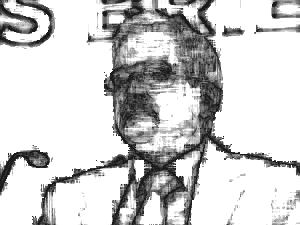

In [26]:
imout_gray, imout = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.1, shade_factor=0.05)
cv2_imshow(imout_gray)

Here we get 2 outputs,This is Gray image output

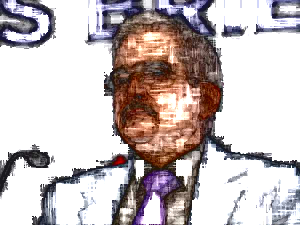

In [29]:
imout_gray, imout = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
cv2_imshow(imout)



*   **Cartoon Effect:**
we have to do certain steps to acheive cartoon effect

1.   convert image to gray scale
2.   Retrive Edges and highlight them
3.   Color Quantization
4.   Smoothing the result-median blur
5.   Combine results with edges








**Step 1. Convert to Grayscale**

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

**Step 2. Retrive Edges and highlight them**

In [32]:
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 9,8)

here 9,8 is the block size so this image will be converted to 9,8 size

**Step 3. Color Quantization**

In [33]:
# defining input data for clustering
data= np.float32(img).reshape((-1,3))

In [34]:
# defining criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
# applying cv2.kmeans function
_, label, center = cv2.kmeans(data,8, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)

In [36]:
# Reshape the output data to mthe size of input image
result = center[label.flatten()]
result = result.reshape(img.shape)

**Step 4: Smoothing the result--> Median Blur**

In [37]:
# smooth the result
blurred = cv2.medianBlur(result,3)

**Step 5. Combine the Results with edges**

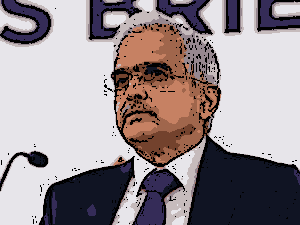

In [38]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)



*  **Water Color:**



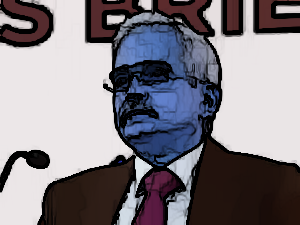

In [39]:
#convert the input image to rgb scale
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#styling of image
img_style = cv2.stylization(img,sigma_s=150,sigma_r=0.25)
cv2_imshow(img_style)